import library

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import plotly.express as px
import joblib
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, mean_squared_error, classification_report
from sklearn.metrics import roc_curve, roc_auc_score, RocCurveDisplay
import time
import warnings
warnings.filterwarnings('ignore')

load dataset

In [4]:
path='/content/heart_disease_uci.csv'
df= pd.read_csv(path)
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


# **EDA & Feature Engeneering**

In [5]:
df.info() #datatype for each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [6]:
df.shape #size of dataset

(920, 16)

In [7]:
df.describe() #basis dataset statistics

,id,age,trestbps,chol,thalch,oldpeak,ca,num
count,920.000000,920.000000,861.000000,890.000000,865.000000,858.000000,309.000000,920.000000
mean,460.500000,53.510870,132.132404,199.130337,137.545665,0.878788,0.676375,0.995652
std,265.725422,9.424685,19.066070,110.780810,25.926276,1.091226,0.935653,1.142693
min,1.000000,28.000000,0.000000,0.000000,60.000000,-2.600000,0.000000,0.000000
25%,230.750000,47.000000,120.000000,175.000000,120.000000,0.000000,0.000000,0.000000
50%,460.500000,54.000000,130.000000,223.000000,140.000000,0.500000,0.000000,1.000000
75%,690.250000,60.000000,140.000000,268.000000,157.000000,1.500000,1.000000,2.000000
max,920.000000,77.000000,200.000000,603.000000,202.000000,6.200000,3.000000,4.000000


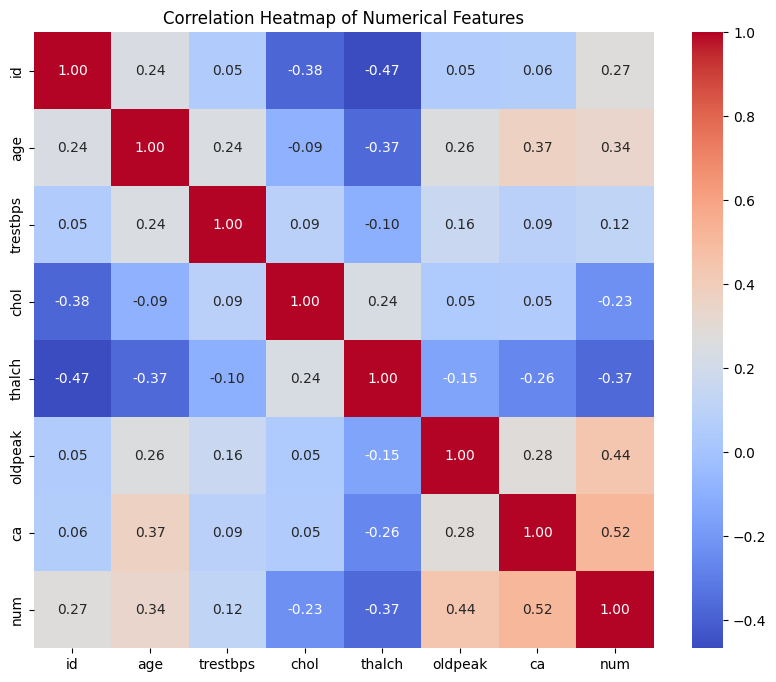

In [8]:
#Correlations of Numerical Coulms Only
df_numerical = df.select_dtypes(include=['float64', 'int64'])
correlation_matrix = df_numerical.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))  # Set the size of the plot
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

In [9]:
value_counts = df['num'].value_counts().reset_index()

# Rename columns for clarity
value_counts.columns = ['Heart Disease Diagnosis', 'Count']

# Save the result to a CSV file (not Excel, but CSV)
value_counts.to_csv('heart_disease_class_counts.csv', index=False)

'id' has only the serial number of each row

i. age column

Mean:  53.51086956521739
Median:  54.0
Mode:  0    54
Name: age, dtype: int64


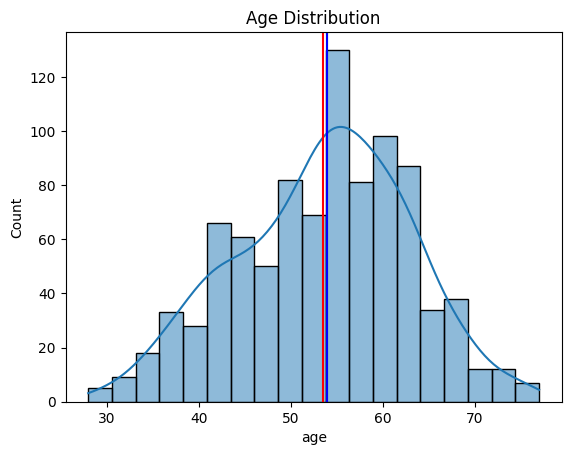

In [10]:
sns.histplot(df['age'], kde=True)
plt.title('Age Distribution')
plt.axvline(df['age'].mean(), color='Red')
plt.axvline(df['age'].median(), color='Green')
plt.axvline(df['age'].mode()[0], color='Blue')

print('Mean: ', df['age'].mean())
print('Median: ', df['age'].median())
print('Mode: ', df['age'].mode())
#'age' has no missing value as see from the description
#we can see that its almost normally distibuted, have some little negetively skewed

ii. sex column

sex
Male      726
Female    194
Name: count, dtype: int64


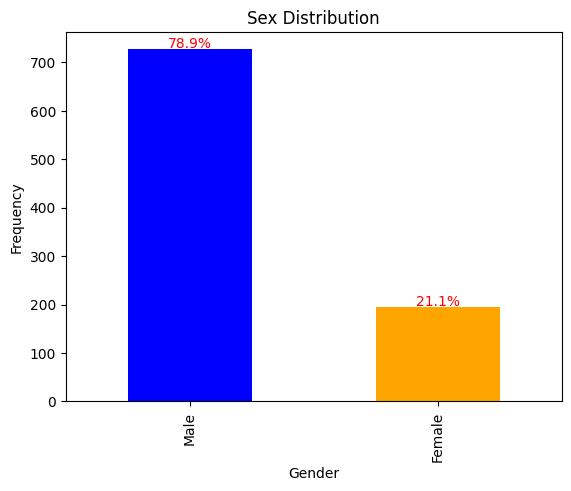

In [11]:
sex_count=df['sex'].value_counts()
print(sex_count)
sex_count.plot( kind='bar', color=['blue','orange'])
plt.title('Sex Distribution')
plt.xlabel('Gender')
plt.ylabel('Frequency')

total = len(df)
for i, count in enumerate(sex_count):
    percentage = count / total * 100
    plt.text(i, count + 4, f'{percentage:.1f}%', ha='center', color='Red')

#there are more males than female in the dataset

iii. dataset column

dataset
Cleveland        304
Hungary          293
VA Long Beach    200
Switzerland      123
Name: count, dtype: int64


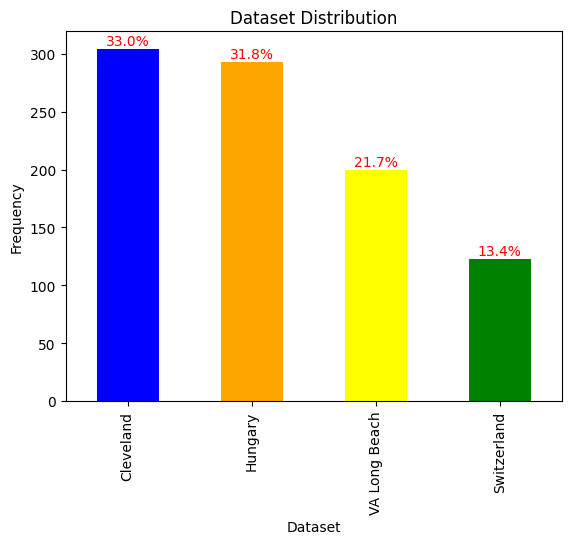

In [12]:
dataset_count=df['dataset'].value_counts()
print(dataset_count)
dataset_count.plot( kind='bar', color=['blue','orange','yellow','green'])
plt.title('Dataset Distribution')
plt.xlabel('Dataset')
plt.ylabel('Frequency')

total = len(df)
for i, count in enumerate(dataset_count):
    percentage = count / total * 100
    plt.text(i, count + 3, f'{percentage:.1f}%', ha='center', color='Red')

In [13]:
print (df.groupby('sex')['dataset'].value_counts()) #values of dataset column groupes by sex
fig =px.bar(df, x='dataset', color='sex') #counts of dataset values, colored by sex
fig.show()

sex     dataset      
Female  Cleveland         97
        Hungary           81
        Switzerland       10
        VA Long Beach      6
Male    Hungary          212
        Cleveland        207
        VA Long Beach    194
        Switzerland      113
Name: count, dtype: int64


In [14]:
# mean median and mode of age column grouped by dataset column
print ("Mean of the dataset: ",df.groupby('dataset')['age'].mean())
print("\n************************************************************")
print ("Median of the dataset: ",df.groupby('dataset')['age'].median())
print("\n************************************************************")
print ("Mode of the dataset: ",df.groupby('dataset')['age'].agg(pd.Series.mode))

Mean of the dataset:  dataset
Cleveland        54.351974
Hungary          47.894198
Switzerland      55.317073
VA Long Beach    59.350000
Name: age, dtype: float64

************************************************************
Median of the dataset:  dataset
Cleveland        55.5
Hungary          49.0
Switzerland      56.0
VA Long Beach    60.0
Name: age, dtype: float64

************************************************************
Mode of the dataset:  dataset
Cleveland              58
Hungary                54
Switzerland            61
VA Long Beach    [62, 63]
Name: age, dtype: object


iv. CP (Chest Pain) column

cp
asymptomatic       496
non-anginal        204
atypical angina    174
typical angina      46
Name: count, dtype: int64


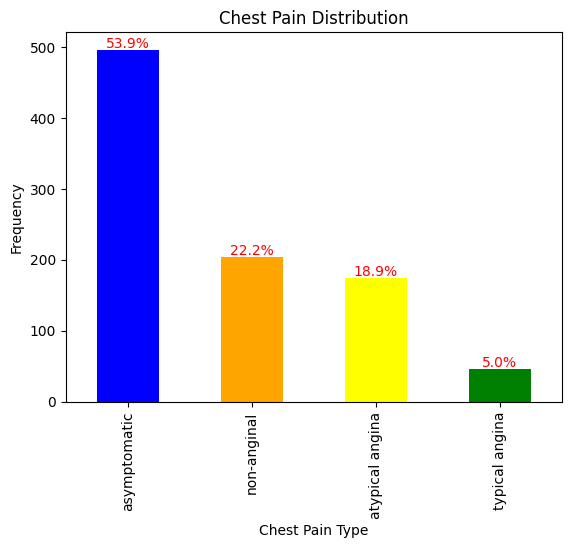

In [15]:
cp_count=df['cp'].value_counts()
print(cp_count)
cp_count.plot( kind='bar', color=['blue','orange','yellow','green'])
plt.title('Chest Pain Distribution')
plt.xlabel('Chest Pain Type')
plt.ylabel('Frequency')

total = len(df)
for i, count in enumerate(cp_count):
    percentage = count / total * 100
    plt.text(i, count + 3, f'{percentage:.1f}%', ha='center', color='Red')

<Axes: xlabel='cp', ylabel='count'>

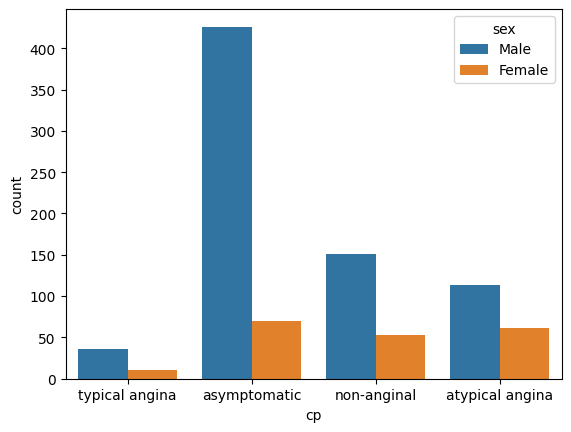

In [16]:
# count plot of cp column by sex column
sns.countplot(df, x='cp', hue= 'sex')

<Axes: xlabel='cp', ylabel='count'>

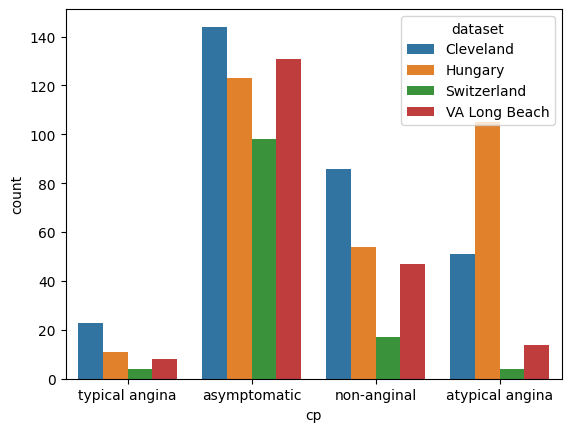

In [17]:
# count plot of cp column by dataset column
sns.countplot(df,x='cp',hue='dataset')

v. trestbps (resting blood pressure) column

--> it has missing values & normal bp is 120/80 mm of Hg. We are taking the standard 120 as upper pressure.

Mean:  132.13240418118468
Median:  130.0
Mode:  0    120.0
Name: trestbps, dtype: float64


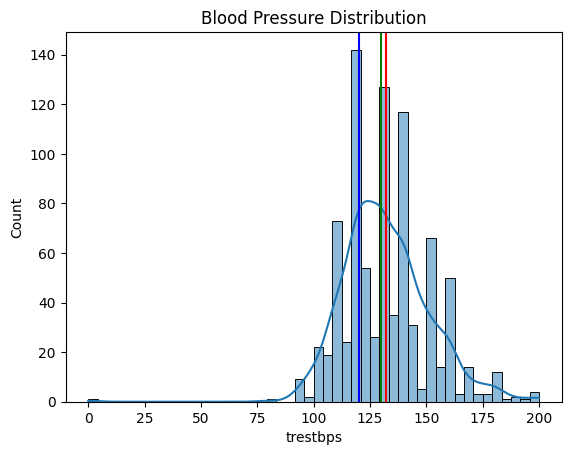

In [18]:
sns.histplot(df['trestbps'], kde=True)
plt.title('Blood Pressure Distribution')
plt.axvline(df['trestbps'].mean(), color='Red')
plt.axvline(df['trestbps'].median(), color='Green')
plt.axvline(df['trestbps'].mode()[0], color='Blue')

print('Mean: ', df['trestbps'].mean())
print('Median: ', df['trestbps'].median())
print('Mode: ', df['trestbps'].mode())
#The negative skew and the presence of a tail could indicate the existence of potential outliers,

vi. chol (Cholestrol) column

--> it has missing values

Mean:  199.13033707865168
Median:  223.0
Mode:  0    0.0
Name: chol, dtype: float64


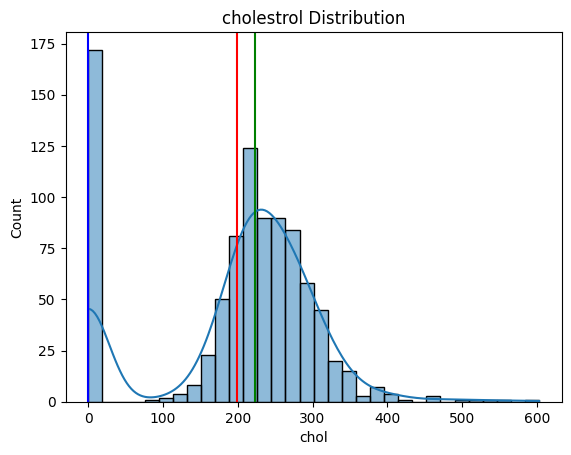

In [19]:
sns.histplot(df['chol'], kde=True)
plt.title('cholestrol Distribution')
plt.axvline(df['chol'].mean(), color='Red')
plt.axvline(df['chol'].median(), color='Green')
plt.axvline(df['chol'].mode()[0], color='Blue')

print('Mean: ', df['chol'].mean())
print('Median: ', df['chol'].median())
print('Mode: ', df['chol'].mode())
#Most people have cholesterol levels around the average, but there are some with higher levels.

vii. fbs (fasting blood sugar) column

--> it has True/False values only. Also have Missing Values

In [20]:
df1=pd.read_csv(path)
df1['ca_original']=df1['fbs'].copy()
df['fbs']=df1['ca_original']

Basic statistics for fbs:
count       830
unique        2
top       False
freq        692
Name: fbs, dtype: object


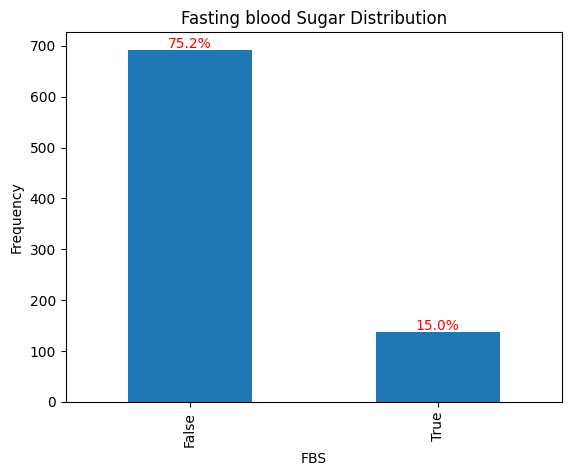

In [21]:
print("Basic statistics for fbs:")
print(df['fbs'].describe())

fbs_count=df['fbs'].value_counts()
fbs_count.plot( kind='bar')
plt.title('Fasting blood Sugar Distribution')
plt.xlabel('FBS')
plt.ylabel('Frequency')

total = len(df)
for i, count in enumerate(fbs_count):
    percentage = count / total * 100
    plt.text(i, count + 3, f'{percentage:.1f}%', ha='center', color='Red')

#less people has fbs

<Axes: xlabel='fbs', ylabel='count'>

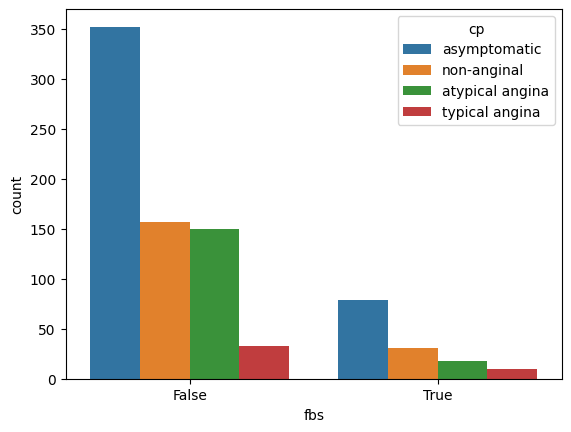

In [22]:
# count plot of fbs column by cp column
sns.countplot(df, x='fbs', hue= 'cp')

<Axes: xlabel='fbs', ylabel='count'>

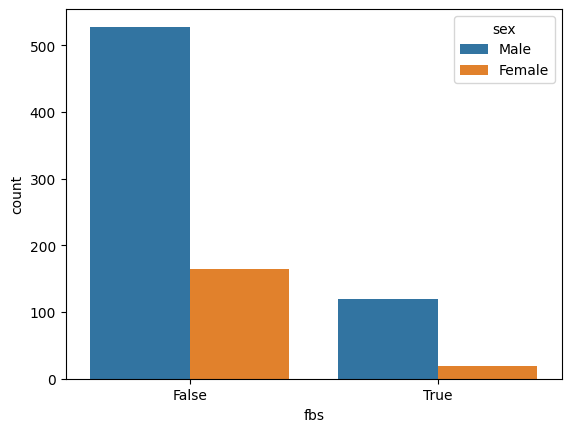

In [23]:
# count plot of fbs column by sex column
sns.countplot(df, x='fbs', hue= 'sex')

<Axes: xlabel='fbs', ylabel='count'>

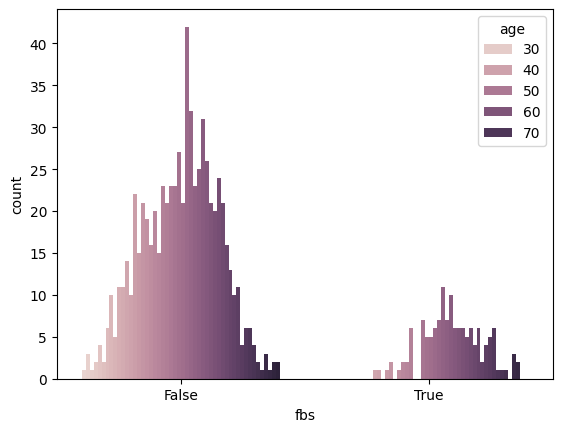

In [24]:
# count plot of fbs column by age column
sns.countplot(df, x='fbs', hue= 'age')

viii. restecg electrocardiographic (ECG) results column

--> Categorical & Also have Missing Values

Basic statistics for ECG:
count        918
unique         3
top       normal
freq         551
Name: restecg, dtype: object


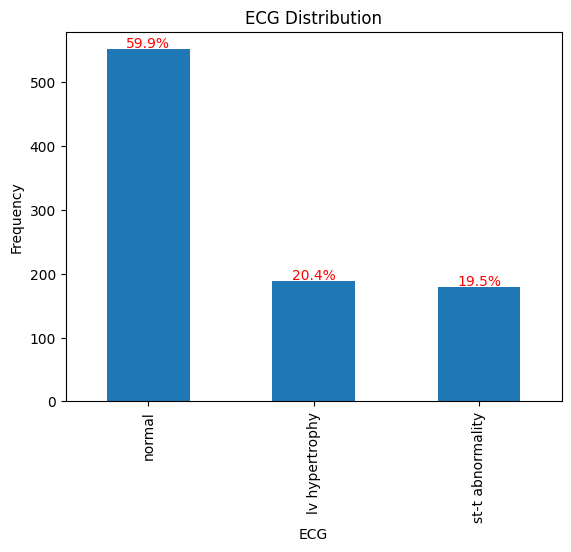

In [25]:
print("Basic statistics for ECG:")
print(df['restecg'].describe())

fbsrest_count=df['restecg'].value_counts()
fbsrest_count.plot( kind='bar')
plt.title('ECG Distribution')
plt.xlabel('ECG')
plt.ylabel('Frequency')

total = len(df)
for i, count in enumerate(fbsrest_count):
    percentage = count / total * 100
    plt.text(i, count + 3, f'{percentage:.1f}%', ha='center', color='Red')

#ECG Report is normal for the most of people

<Axes: xlabel='restecg', ylabel='count'>

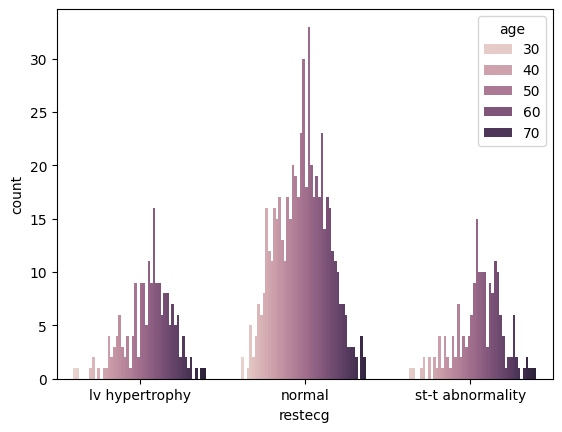

In [26]:
# count plot of restecg column by cp age
sns.countplot(df, x='restecg', hue= 'age')

<Axes: xlabel='restecg', ylabel='count'>

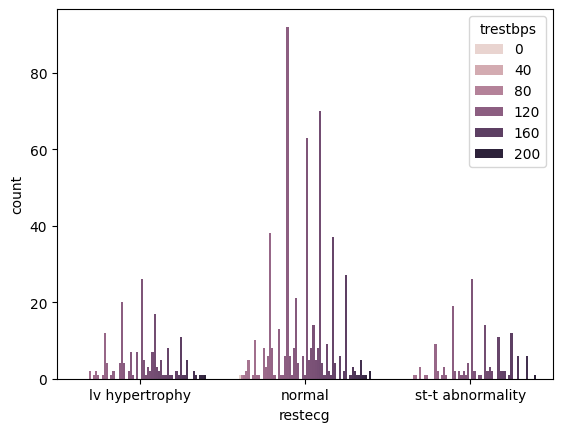

In [27]:
# count plot of restecg column by cp trestbps
sns.countplot(df, x='restecg', hue= 'trestbps')

ix. thalch (maximum heart rate achieved) column

--> Also have Missing Values

Mean:  137.5456647398844
Median:  140.0
Mode:  0    150.0
Name: thalch, dtype: float64


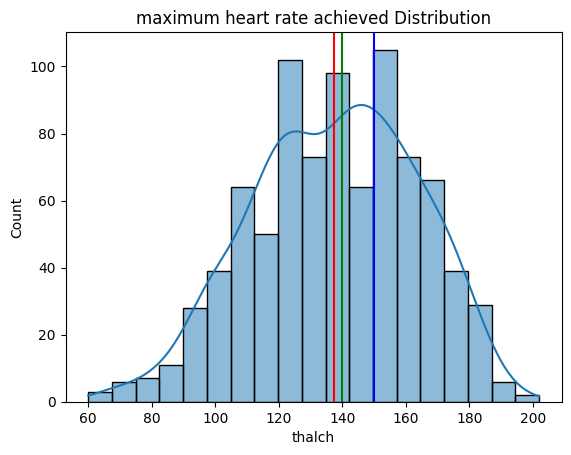

In [28]:
sns.histplot(df['thalch'], kde=True)
plt.title('maximum heart rate achieved Distribution')
plt.axvline(df['thalch'].mean(), color='Red')
plt.axvline(df['thalch'].median(), color='Green')
plt.axvline(df['thalch'].mode()[0], color='Blue')

print('Mean: ', df['thalch'].mean())
print('Median: ', df['thalch'].median())
print('Mode: ', df['thalch'].mode())
# most individuals in the dataset achieved higher maximum heart rates 140 during the test, almost normally distributed

x. exang (exercise-induced angina/chest pain) column

--> True False Values & missing values present


Basic statistics for exercise-induced angina:
count       865
unique        2
top       False
freq        528
Name: exang, dtype: object


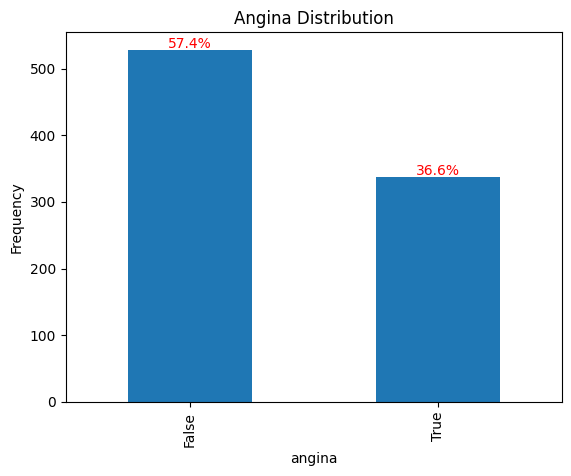

In [29]:
print("Basic statistics for exercise-induced angina:")
print(df['exang'].describe())

exang_count=df['exang'].value_counts()
exang_count.plot( kind='bar')
plt.title('Angina Distribution')
plt.xlabel('angina')
plt.ylabel('Frequency')

total = len(df)
for i, count in enumerate(exang_count):
    percentage = count / total * 100
    plt.text(i, count + 3, f'{percentage:.1f}%', ha='center', color='Red')

#50% of the people dont have angina

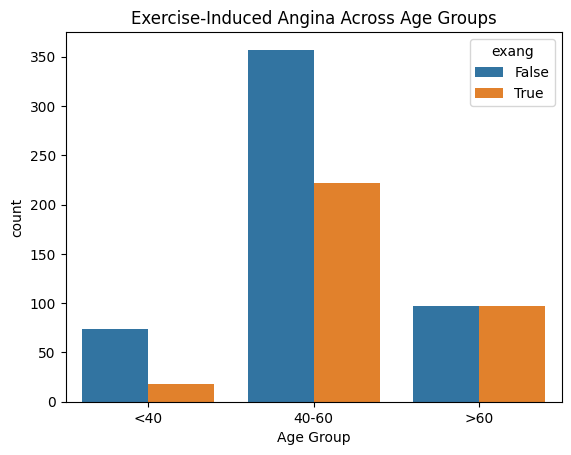

In [30]:
#angina in different age groups
df['age_group'] = pd.cut(df['age'], bins=[0, 40, 60, 100], labels=['<40', '40-60', '>60'])

# Count the distribution of exang by age group
sns.countplot(x='age_group', hue='exang', data=df)
plt.title("Exercise-Induced Angina Across Age Groups")
plt.xlabel("Age Group")
plt.show()
df.drop('age_group', axis=1, inplace=True)

<Axes: xlabel='exang', ylabel='count'>

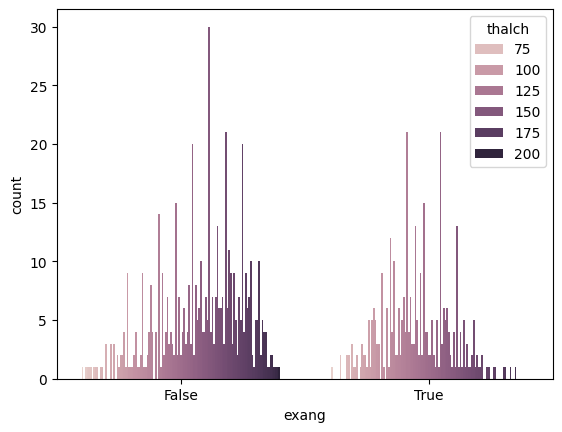

In [31]:
# count plot of exang column by thalch
sns.countplot(df, x='exang', hue= 'thalch')

<Axes: xlabel='exang', ylabel='count'>

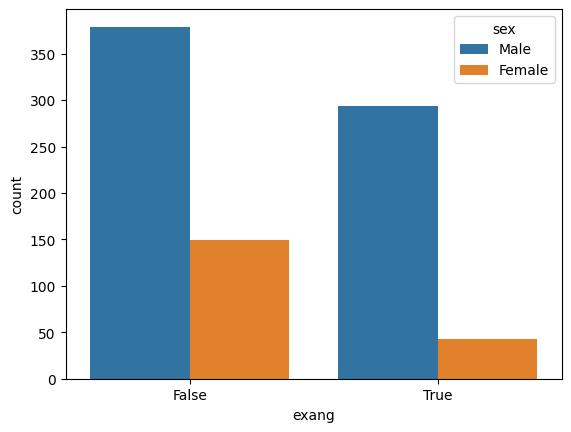

In [32]:
# count plot of exang column by  sex column
sns.countplot(df, x='exang', hue= 'sex')

xi. oldpeak column

--> Missing values

Mean:  0.8787878787878788
Median:  0.5
Mode:  0    0.0
Name: oldpeak, dtype: float64


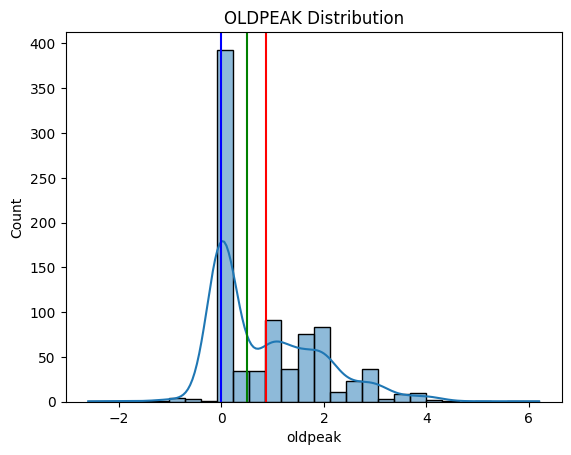

In [33]:
sns.histplot(df['oldpeak'], kde=True)
plt.title('OLDPEAK Distribution')
plt.axvline(df['oldpeak'].mean(), color='Red')
plt.axvline(df['oldpeak'].median(), color='Green')
plt.axvline(df['oldpeak'].mode()[0], color='Blue')

print('Mean: ', df['oldpeak'].mean())
print('Median: ', df['oldpeak'].median())
print('Mode: ', df['oldpeak'].mode())
#Most individuals in the dataset have low oldpeak values (close to 0) and many of them has more oldpeak more than 0 ie right skewed

xii. slope column

-->Categorical & Have missing values

Basic statistics for  slope of the peak exercise ST segment:
count      611
unique       3
top       flat
freq       345
Name: slope, dtype: object


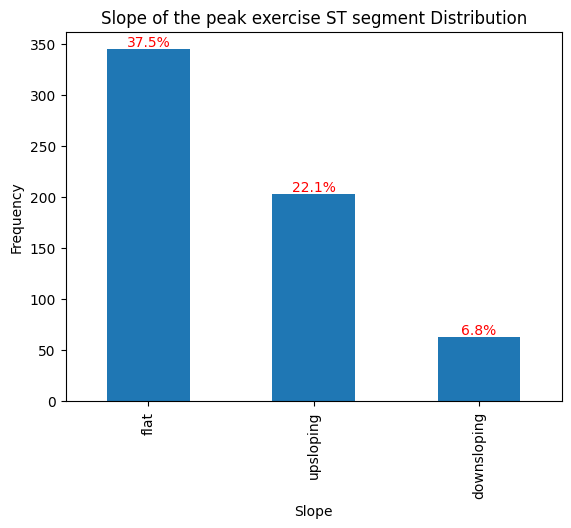

In [34]:
print("Basic statistics for  slope of the peak exercise ST segment:")
print(df['slope'].describe())

slope_count=df['slope'].value_counts()
slope_count.plot( kind='bar')
plt.title('Slope of the peak exercise ST segment Distribution')
plt.xlabel('Slope')
plt.ylabel('Frequency')

total = len(df)
for i, count in enumerate(slope_count):
    percentage = count / total * 100
    plt.text(i, count + 3, f'{percentage:.1f}%', ha='center', color='Red')

<Axes: xlabel='slope', ylabel='count'>

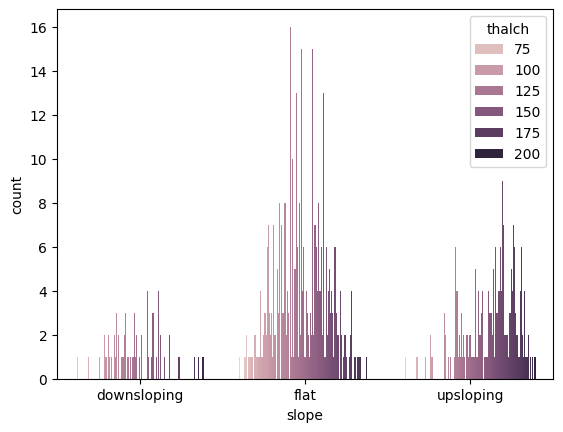

In [35]:
# count plot of slope column by cp thalch column
sns.countplot(df, x='slope', hue= 'thalch')

<Axes: xlabel='slope', ylabel='count'>

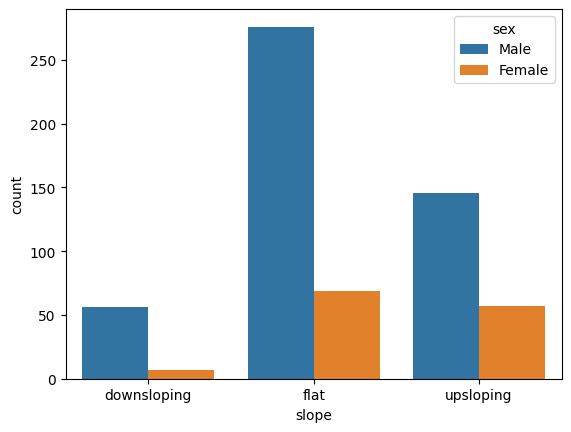

In [36]:
# count plot of exang column by  sex column
sns.countplot(df, x='slope', hue= 'sex')

xiii. ca(number of major vessels ) column

-->Have Missing values

In [37]:
df['ca'].value_counts()

,count
ca,
0.0,181
1.0,67
2.0,41
3.0,20


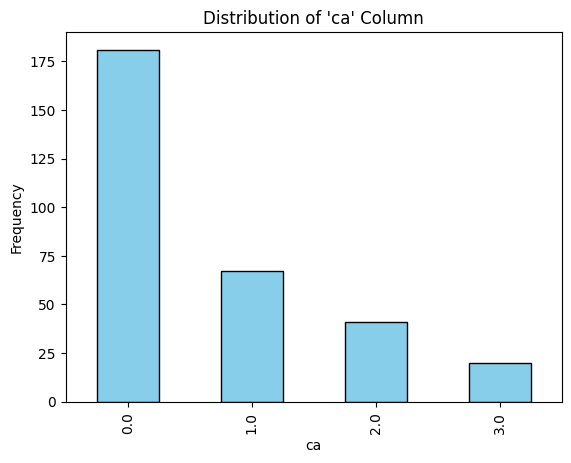

In [38]:
df['ca'].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Distribution of 'ca' Column")
plt.xlabel("ca")
plt.ylabel("Frequency")
plt.show()
#Most people with No major vessels colored

xiv. thal (thalassemia condition) column

-->Categorical & Have missing values

Basic statistics for  thalassemia condition:
count        434
unique         3
top       normal
freq         196
Name: thal, dtype: object


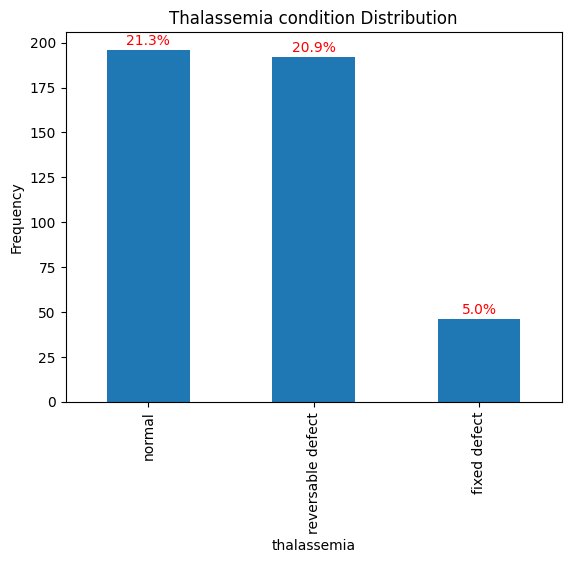

In [39]:
print("Basic statistics for  thalassemia condition:")
print(df['thal'].describe())

thal_count=df['thal'].value_counts()
thal_count.plot( kind='bar')
plt.title('Thalassemia condition Distribution')
plt.xlabel('thalassemia')
plt.ylabel('Frequency')

total = len(df)
for i, count in enumerate(thal_count):
    percentage = count / total * 100
    plt.text(i, count + 3, f'{percentage:.1f}%', ha='center', color='Red')

<Axes: xlabel='thal', ylabel='count'>

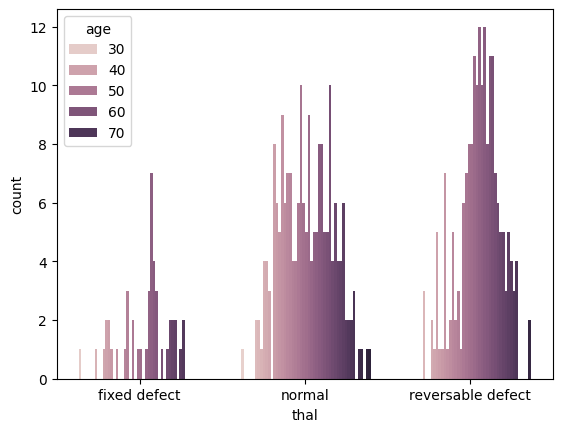

In [40]:
# count plot of thal column by  age column
sns.countplot(df, x='thal', hue= 'age')

<Axes: xlabel='thal', ylabel='count'>

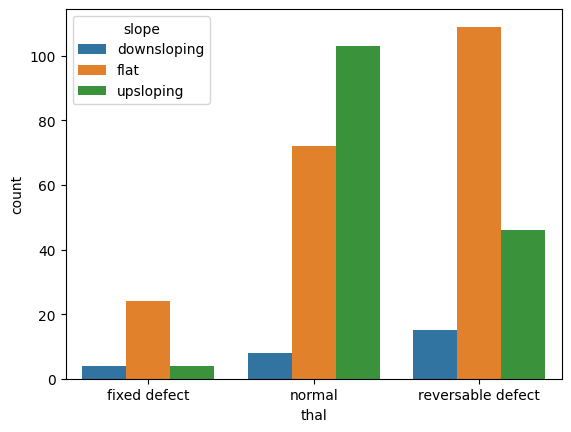

In [41]:
# count plot of thal column by  slope column
sns.countplot(df, x='thal', hue= 'slope')

<Axes: xlabel='thal', ylabel='count'>

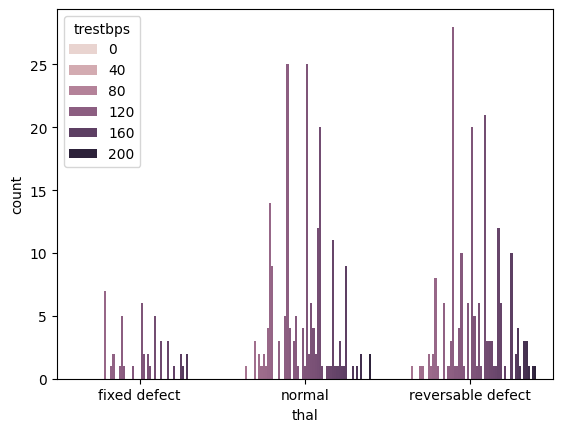

In [42]:
# count plot of thal column by  trestbps column
sns.countplot(df, x='thal', hue= 'trestbps')

In [43]:
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


#### Dealing with Outliers for Numerical Columns

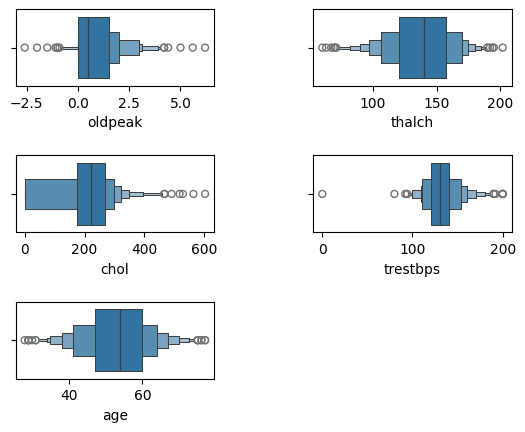

In [45]:
numeric_cols = ['oldpeak', 'thalch', 'chol', 'trestbps', 'age'] #Not including CA
for i, col in enumerate(numeric_cols):
    plt.subplot(3,2, i+1)
    sns.boxenplot(x=df[col])


plt.subplots_adjust(hspace=0.9, wspace=0.5)
plt.show()

In [46]:
#Handle the outlier by IQR Method
#but large age, is not outlier, but 0 trestbps is outlier
actual_outliers = ['oldpeak',  'thalch', 'chol', 'trestbps']

for col in actual_outliers:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Cap the outliers
    df[col] = df[col].apply(lambda x: lower_bound if x < lower_bound else (upper_bound if x > upper_bound else x))

# Display the dataset after outlier handling
print(df[actual_outliers].describe())


          oldpeak      thalch        chol    trestbps
count  858.000000  865.000000  890.000000  861.000000
mean     0.868531  137.552601  205.033146  131.843206
std      1.054650   25.906200   96.055224   17.486468
min     -2.250000   64.500000   35.500000   90.000000
25%      0.000000  120.000000  175.000000  120.000000
50%      0.500000  140.000000  223.000000  130.000000
75%      1.500000  157.000000  268.000000  140.000000
max      3.750000  202.000000  407.500000  170.000000


### Dealing with Missing values of the categorical columns

In [47]:
categorical_cols = ['thal', 'slope', 'exang', 'restecg','fbs', 'cp', 'sex'] #NOT TAKING 'DATASET' COLUMN
numeric_cols = ['oldpeak', 'thalch', 'chol', 'trestbps', 'age', 'ca']

nan_categorial_cols = ['fbs', 'restecg', 'exang', 'slope', 'thal']#columns with missing values

### Encoding Categorical Data

**Nominal Data**: sex, cp, restecg, exang, thal, fbs

**Ordinal Data**: slope



## Feature Engeneering using Pipeline

In [48]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, FunctionTransformer


# Define columns for different preprocessing steps

num_columns_mean = ['trestbps', 'chol', 'thalch', 'oldpeak']
cat_columns_mode = ['ca']
nominal_columns = ['sex', 'cp', 'restecg', 'exang', 'thal', 'fbs']
ordinal_columns = ['slope']

# Define the transformations
num_mean_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean'))
])

cat_mode_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent'))
])

nominal_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

ordinal_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('ordinal', OrdinalEncoder())
])

# Combine all transformations
preprocessor = ColumnTransformer(transformers=[
    ('num_mean', num_mean_transformer, num_columns_mean),
    ('cat_mode', cat_mode_transformer, cat_columns_mode),
    ('nominal', nominal_transformer, nominal_columns),
    ('ordinal', ordinal_transformer, ordinal_columns)
])

# Create the final pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

# Apply pipeline on the dataset
processed_data = pipeline.fit_transform(df)
# Convert processed data to DataFrame and add 'age' column
processed_df = pd.DataFrame(
    processed_data,
    columns=[
        *num_columns_mean,
        'ca',
        *pipeline.named_steps['preprocessor'].transformers_[2][1]['onehot'].get_feature_names_out(nominal_columns),
        'slope'
    ]
)

# Add 'age' column
processed_df['age'] = df['age'].values

''' CREATING NEW COLUMN 'bp_to_chol_ratio' FROM EXISTING & DROPPING COLUMNS 'id' & 'dataset' '''
processed_df['bp_to_chol_ratio'] = processed_df['trestbps'] / processed_df['chol'] #new column 1
processed_df['age_to_max_hr'] = processed_df['age'] / processed_df['thalch'] #new column 2



# Reorder columns as specified
ordered_columns = ['age', 'sex_Female', 'sex_Male',  'cp_asymptomatic', 'cp_atypical angina', 'cp_non-anginal',
                   'cp_typical angina', 'trestbps', 'chol', 'bp_to_chol_ratio', 'fbs_False', 'fbs_True', 'restecg_lv hypertrophy',
                   'restecg_normal', 'restecg_st-t abnormality', 'thalch', 'age_to_max_hr', 'exang_False', 'exang_True', 'oldpeak',
                   'slope', 'ca', 'thal_fixed defect', 'thal_normal', 'thal_reversable defect']

# Ensure all columns are included in the final order
final_df = processed_df.reindex(columns=ordered_columns, fill_value=np.nan)
# final_df.drop('dataset', axis=1, inplace=True)
# Display the resulting DataFrame
final_df.head()

,age,sex_Female,sex_Male,cp_asymptomatic,cp_atypical angina,cp_non-anginal,cp_typical angina,trestbps,chol,bp_to_chol_ratio,...,thalch,age_to_max_hr,exang_False,exang_True,oldpeak,slope,ca,thal_fixed defect,thal_normal,thal_reversable defect
0,63,0.0,1.0,0.0,0.0,0.0,1.0,145.0,233.0,0.622318,...,150.0,0.420000,1.0,0.0,2.3,0.0,0.0,1.0,0.0,0.0
1,67,0.0,1.0,1.0,0.0,0.0,0.0,160.0,286.0,0.559441,...,108.0,0.620370,0.0,1.0,1.5,1.0,3.0,0.0,1.0,0.0
2,67,0.0,1.0,1.0,0.0,0.0,0.0,120.0,229.0,0.524017,...,129.0,0.519380,0.0,1.0,2.6,1.0,2.0,0.0,0.0,1.0
3,37,0.0,1.0,0.0,0.0,1.0,0.0,130.0,250.0,0.520000,...,187.0,0.197861,1.0,0.0,3.5,0.0,0.0,0.0,1.0,0.0
4,41,1.0,0.0,0.0,1.0,0.0,0.0,130.0,204.0,0.637255,...,172.0,0.238372,1.0,0.0,1.4,2.0,0.0,0.0,1.0,0.0


In [49]:
type(processed_df)

pandas.core.frame.DataFrame

In [50]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       920 non-null    int64  
 1   sex_Female                920 non-null    float64
 2   sex_Male                  920 non-null    float64
 3   cp_asymptomatic           920 non-null    float64
 4   cp_atypical angina        920 non-null    float64
 5   cp_non-anginal            920 non-null    float64
 6   cp_typical angina         920 non-null    float64
 7   trestbps                  920 non-null    float64
 8   chol                      920 non-null    float64
 9   bp_to_chol_ratio          920 non-null    float64
 10  fbs_False                 920 non-null    float64
 11  fbs_True                  920 non-null    float64
 12  restecg_lv hypertrophy    920 non-null    float64
 13  restecg_normal            920 non-null    float64
 14  restecg_st

In [51]:
final_df.shape

(920, 25)

In [52]:
dataset=final_df.copy()
final_df.describe()

,age,sex_Female,sex_Male,cp_asymptomatic,cp_atypical angina,cp_non-anginal,cp_typical angina,trestbps,chol,bp_to_chol_ratio,...,thalch,age_to_max_hr,exang_False,exang_True,oldpeak,slope,ca,thal_fixed defect,thal_normal,thal_reversable defect
count,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,...,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000
mean,53.510870,0.210870,0.789130,0.539130,0.189130,0.221739,0.050000,131.843206,205.033146,1.144534,...,137.552601,0.408623,0.633696,0.366304,0.868531,1.152174,0.227174,0.050000,0.741304,0.208696
std,9.424685,0.408148,0.408148,0.498738,0.391825,0.415642,0.218063,16.915840,94.474394,1.232896,...,25.119028,0.127655,0.482056,0.482056,1.018453,0.516007,0.628936,0.218063,0.438156,0.406597
min,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,90.000000,35.500000,0.277301,...,64.500000,0.143564,0.000000,0.000000,-2.250000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,120.000000,177.750000,0.486460,...,120.000000,0.318301,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,54.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,130.000000,221.000000,0.592593,...,138.000000,0.396689,1.000000,0.000000,0.800000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,60.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,140.000000,267.000000,0.766776,...,156.000000,0.477577,1.000000,1.000000,1.500000,1.000000,0.000000,0.000000,1.000000,0.000000
max,77.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,170.000000,407.500000,4.788732,...,202.000000,0.970149,1.000000,1.000000,3.750000,2.000000,3.000000,1.000000,1.000000,1.000000


# **Applying Various Models**

 **train test split the dataset **

 80-20 ratio

In [53]:
# split the data into train and test
from sklearn.model_selection import train_test_split

#features is dataset dataframe
#target column is 'num'
X_train, X_test, y_train, y_test = train_test_split(dataset, df['num'], test_size=0.2, random_state=42)

Scaling the dataset

-->use whenever scaling values are needed

In [54]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
##transform convert it to an numpy array
X_train_scale=scaler.fit_transform(X_train) #fit_transform combines both fitting and transforming into a single step for convenience.
X_test_scale=scaler.transform(X_test)


## 1. KKN ALGORITHM

In [55]:
from sklearn.neighbors import KNeighborsClassifier

time_model=list()

start_time = time.time()
knn_model = Pipeline(steps=[
    ('scaler', StandardScaler()),  # Step for scaling
    ('knn', KNeighborsClassifier(n_neighbors=5))  # KNN model with 5 neighbors
])

# Train the model
knn_model.fit(X_train, y_train)
end_time = time.time()
time_model.append(end_time - start_time)

In [56]:
# Save the pipeline for use in Streamlit
joblib.dump(knn_model, 'knn_model.pkl')
print("Model saved as 'knn_model.pkl'")

Model saved as 'knn_model.pkl'


**Confusion Matrix**

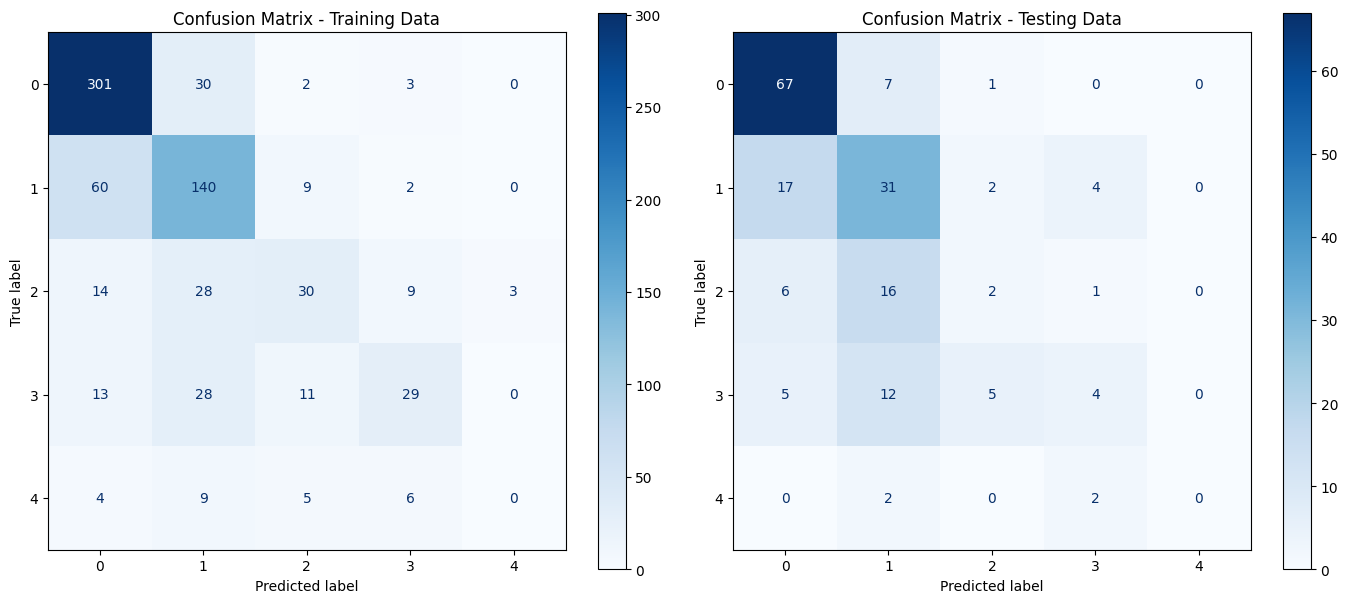

In [57]:
knn_y_train_pred = knn_model.predict(X_train)
knn_y_test_pred = knn_model.predict(X_test)

# Plot confusion matrix for training data
fig, ax = plt.subplots(1, 2, figsize=(14, 6))
ConfusionMatrixDisplay.from_predictions(y_train, knn_y_train_pred, ax=ax[0], cmap='Blues')
ax[0].set_title("Confusion Matrix - Training Data")

# Plot confusion matrix for testing data
ConfusionMatrixDisplay.from_predictions(y_test, knn_y_test_pred, ax=ax[1], cmap='Blues')
ax[1].set_title("Confusion Matrix - Testing Data")
plt.tight_layout()  # Adjust layout to avoid overlap
plt.savefig('knn1.png', dpi=300)
plt.show()

## 2. SVM Algorithm

In [58]:
from sklearn.svm import SVC


start_time = time.time()
svm_model= Pipeline(steps=[
    ('scaler', StandardScaler()),            # Step for scaling
    ('svm', SVC(kernel='linear', C=1, random_state=42))       # SVM model with linear kernel
])

# Train the model
svm_model.fit(X_train, y_train)
end_time = time.time()
time_model.append(end_time - start_time)

In [59]:
# Save the pipeline for use in Streamlit
joblib.dump(svm_model, 'svm_model.pkl')
print("Model saved as 'svm_model.pkl'")

Model saved as 'svm_model.pkl'


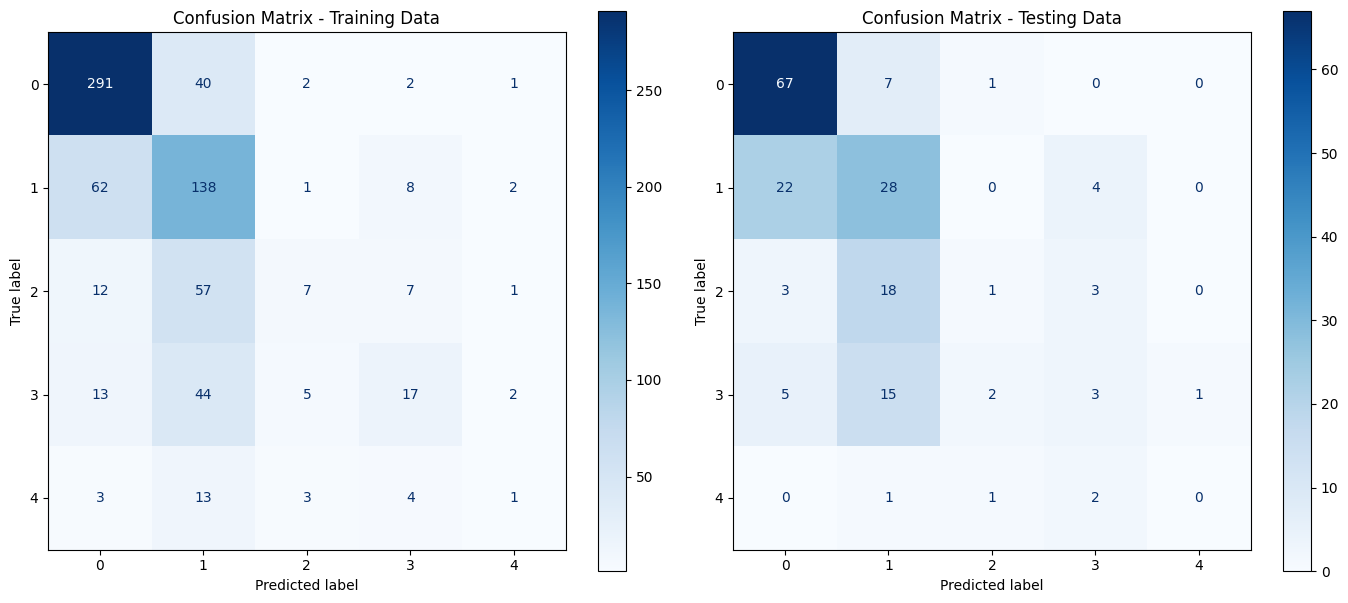

In [60]:
svm_y_train_pred = svm_model.predict(X_train)
svm_y_test_pred = svm_model.predict(X_test)

# Plot confusion matrix for training data
fig, ax = plt.subplots(1, 2, figsize=(14, 6))
ConfusionMatrixDisplay.from_predictions(y_train, svm_y_train_pred, ax=ax[0], cmap='Blues')
ax[0].set_title("Confusion Matrix - Training Data")

# Plot confusion matrix for testing data
ConfusionMatrixDisplay.from_predictions(y_test, svm_y_test_pred, ax=ax[1], cmap='Blues')
ax[1].set_title("Confusion Matrix - Testing Data")
plt.tight_layout()  # Adjust layout to avoid overlap
plt.savefig('svm1.png', dpi=300)
plt.show()

In [61]:
plt.tight_layout()  # Adjust layout to avoid overlap
plt.savefig('svm.png', dpi=300)

<Figure size 640x480 with 0 Axes>

## 3. Logistic Regression Classification

In [62]:
from sklearn.linear_model import LogisticRegression

start_time = time.time()
logreg_model = Pipeline(steps=[
    ('scaler', StandardScaler()),                    # Step for scaling
    ('logreg', LogisticRegression(max_iter=1000))    # Logistic Regression model with increased iterations
])

# Train the model
logreg_model.fit(X_train, y_train)
end_time = time.time()
time_model.append(end_time - start_time)

In [63]:
# Save the pipeline for use in Streamlit
joblib.dump(svm_model, 'logreg_model.pkl')
print("Model saved as 'logreg_model.pkl'")

Model saved as 'logreg_model.pkl'


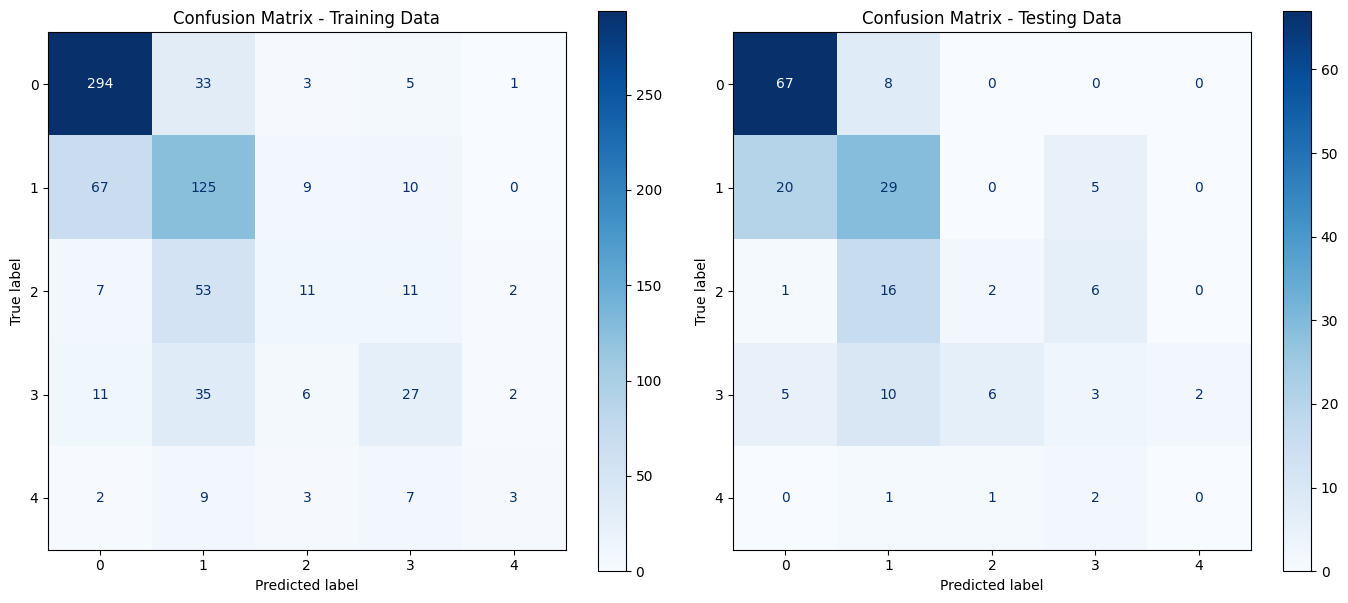

In [64]:
logreg_y_train_pred = logreg_model.predict(X_train)
logreg_y_test_pred = logreg_model.predict(X_test)

# Plot confusion matrix for training data
fig, ax = plt.subplots(1, 2, figsize=(14, 6))
ConfusionMatrixDisplay.from_predictions(y_train, logreg_y_train_pred, ax=ax[0], cmap='Blues')
ax[0].set_title("Confusion Matrix - Training Data")

# Plot confusion matrix for testing data
ConfusionMatrixDisplay.from_predictions(y_test, logreg_y_test_pred, ax=ax[1], cmap='Blues')
ax[1].set_title("Confusion Matrix - Testing Data")
plt.tight_layout()  # Adjust layout to avoid overlap
plt.savefig('logis1.png', dpi=300)
plt.show()

## 4. GradientBoostingClassifier Algorithm

In [65]:
from sklearn.ensemble import GradientBoostingClassifier

start_time = time.time()
gb_model = Pipeline(steps=[
    ('gb', GradientBoostingClassifier(n_estimators=100, random_state=42))  # Gradient Boosting model
])

# Train the model
gb_model.fit(X_train, y_train)
end_time = time.time()
time_model.append(end_time - start_time)

In [66]:
# Save the pipeline for use in Streamlit
joblib.dump(svm_model, 'gb_model.pkl')
print("Model saved as 'gb_model.pkl'")

Model saved as 'gb_model.pkl'


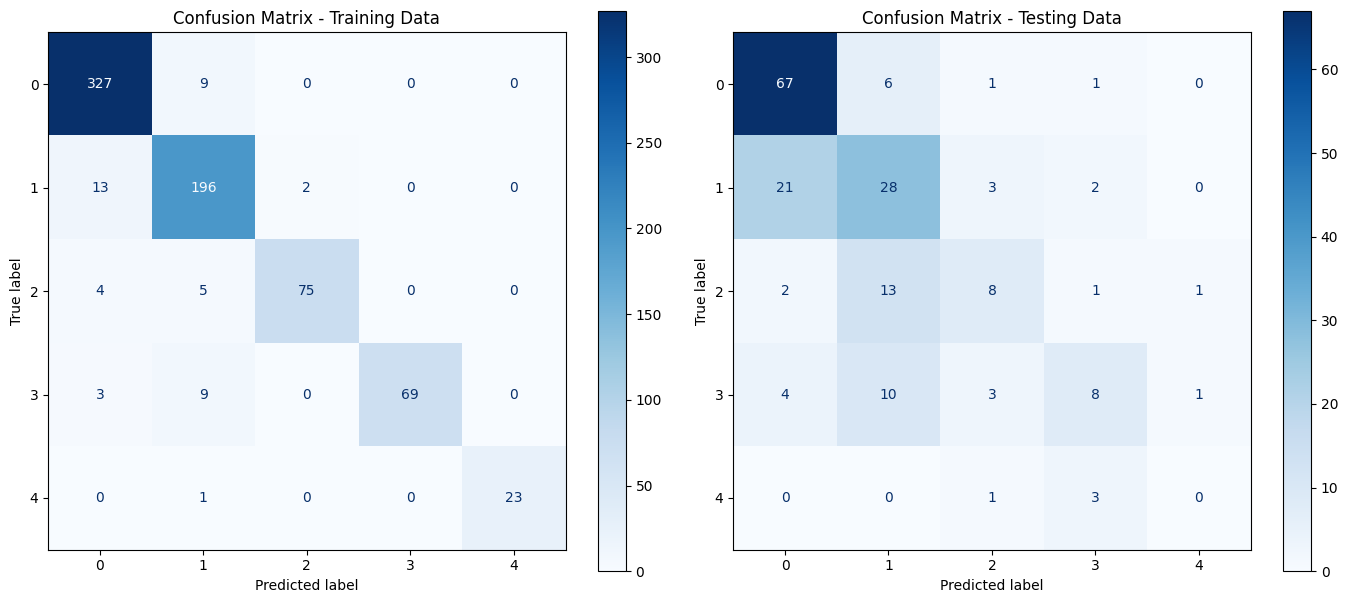

In [67]:
gb_y_train_pred = gb_model.predict(X_train)
gb_y_test_pred = gb_model.predict(X_test)

# Plot confusion matrix for training data
fig, ax = plt.subplots(1, 2, figsize=(14, 6))
ConfusionMatrixDisplay.from_predictions(y_train, gb_y_train_pred, ax=ax[0], cmap='Blues')
ax[0].set_title("Confusion Matrix - Training Data")

# Plot confusion matrix for testing data
ConfusionMatrixDisplay.from_predictions(y_test, gb_y_test_pred, ax=ax[1], cmap='Blues')
ax[1].set_title("Confusion Matrix - Testing Data")
plt.tight_layout()  # Adjust layout to avoid overlap
plt.savefig('Gradient1.png', dpi=300)
plt.show()

## 5. Decision Tree Algorithm

In [68]:
from sklearn.tree import DecisionTreeClassifier

start_time = time.time()
dt_model = Pipeline(steps=[
    ('dt', DecisionTreeClassifier(random_state=42))  # Decision Tree model
])

# Train the model
dt_model.fit(X_train, y_train)
end_time = time.time()
time_model.append(end_time - start_time)

In [69]:
# Save the pipeline for use in Streamlit
joblib.dump(svm_model, 'dt_model.pkl')
print("Model saved as 'dt_model.pkl'")

Model saved as 'dt_model.pkl'


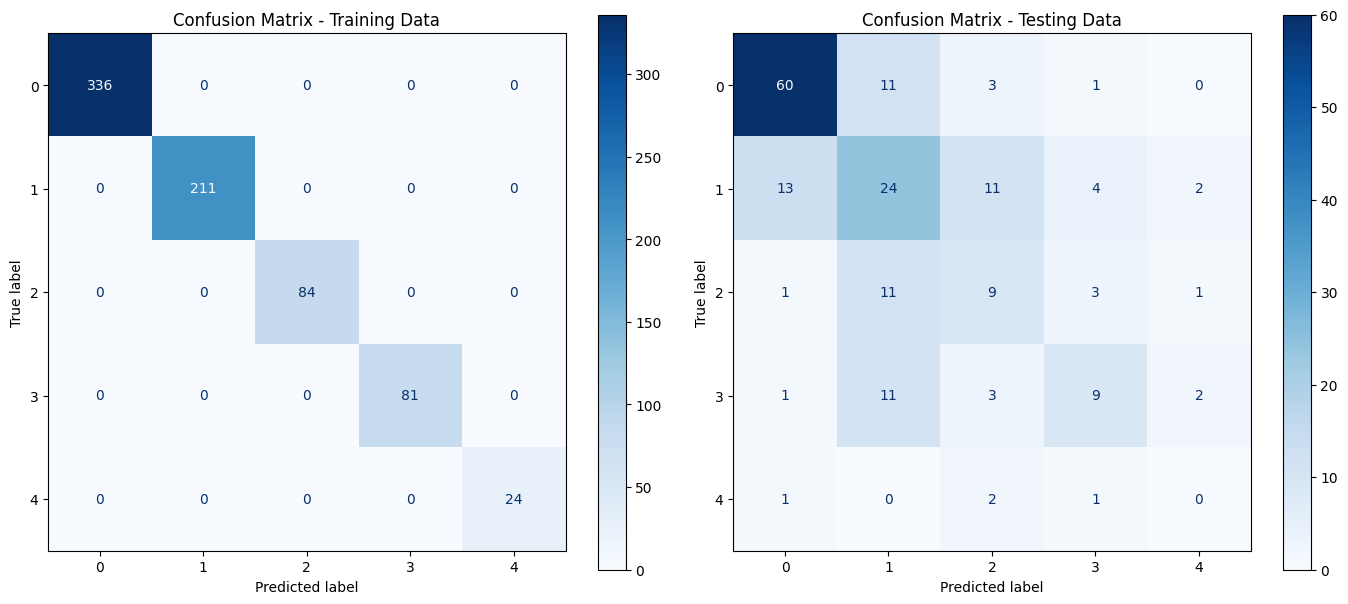

In [70]:
dt_y_train_pred = dt_model.predict(X_train)
dt_y_test_pred = dt_model.predict(X_test)

# Plot confusion matrix for training data
fig, ax = plt.subplots(1, 2, figsize=(14, 6))
ConfusionMatrixDisplay.from_predictions(y_train, dt_y_train_pred, ax=ax[0], cmap='Blues')
ax[0].set_title("Confusion Matrix - Training Data")

# Plot confusion matrix for testing data
ConfusionMatrixDisplay.from_predictions(y_test, dt_y_test_pred, ax=ax[1], cmap='Blues')
ax[1].set_title("Confusion Matrix - Testing Data")
plt.tight_layout()  # Adjust layout to avoid overlap
plt.savefig('Decision1.png', dpi=300)
plt.show()

## 6. Random Forest Algorithm

In [71]:
from sklearn.ensemble import RandomForestClassifier

start_time = time.time()
rf_model = Pipeline(steps=[
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42))  # Random Forest model
])

# Train the model
rf_model.fit(X_train, y_train)
end_time = time.time()
time_model.append(end_time - start_time)

In [72]:
# Save the pipeline for use in Streamlit
joblib.dump(svm_model, 'rf_model.pkl')
print("Model saved as 'rf_model.pkl'")

Model saved as 'rf_model.pkl'


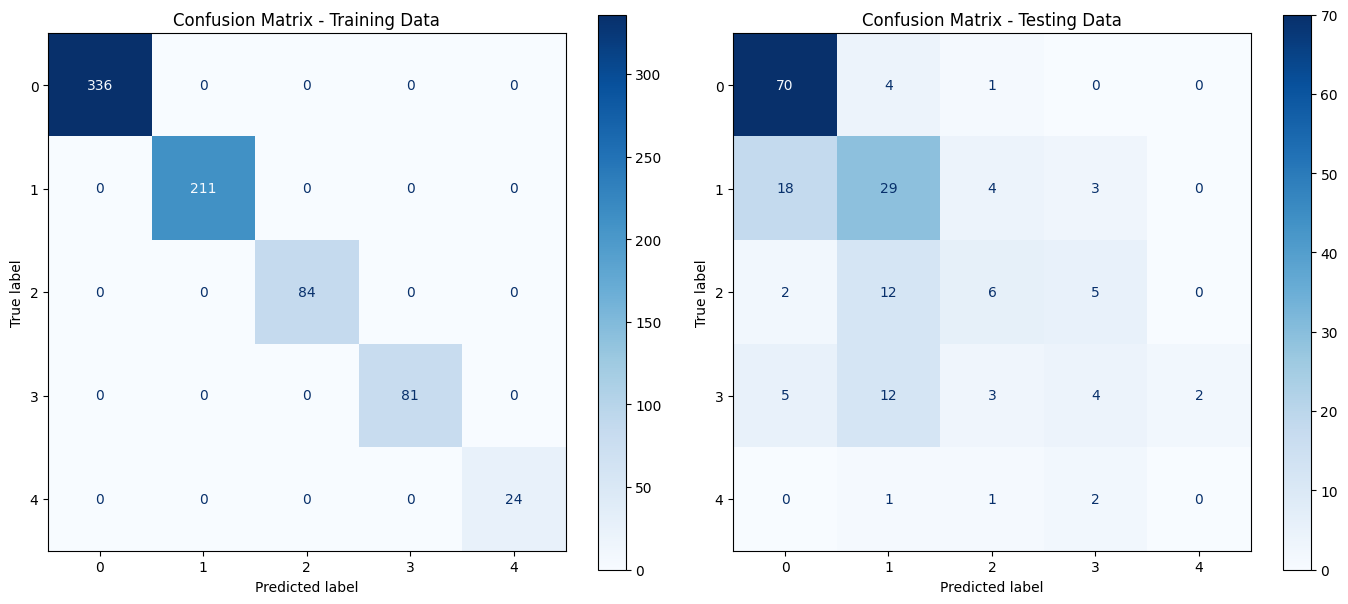

In [73]:
rf_y_train_pred = rf_model.predict(X_train)
rf_y_test_pred = rf_model.predict(X_test)

# Plot confusion matrix for training data
fig, ax = plt.subplots(1, 2, figsize=(14, 6))
ConfusionMatrixDisplay.from_predictions(y_train, rf_y_train_pred, ax=ax[0], cmap='Blues')
ax[0].set_title("Confusion Matrix - Training Data")

# Plot confusion matrix for testing data
ConfusionMatrixDisplay.from_predictions(y_test, rf_y_test_pred, ax=ax[1], cmap='Blues')
ax[1].set_title("Confusion Matrix - Testing Data")
plt.tight_layout()  # Adjust layout to avoid overlap
plt.savefig('random1.png', dpi=300)
plt.show()

## 7. Gaussian Naive Bayes

(as heart disease dataset includes continuous features)

In [74]:
from sklearn.naive_bayes import GaussianNB

start_time
nb_model = Pipeline(steps=[
    ('scaler', StandardScaler()),            # Step for scaling
    ('nb', GaussianNB())                     # Gaussian Naive Bayes model
])

# Train the model
nb_model.fit(X_train, y_train)
end_time = time.time()
time_model.append(end_time - start_time)

In [75]:
# Save the pipeline for use in Streamlit
joblib.dump(svm_model, 'nb_model.pkl')
print("Model saved as 'nb_model.pkl'")

Model saved as 'nb_model.pkl'


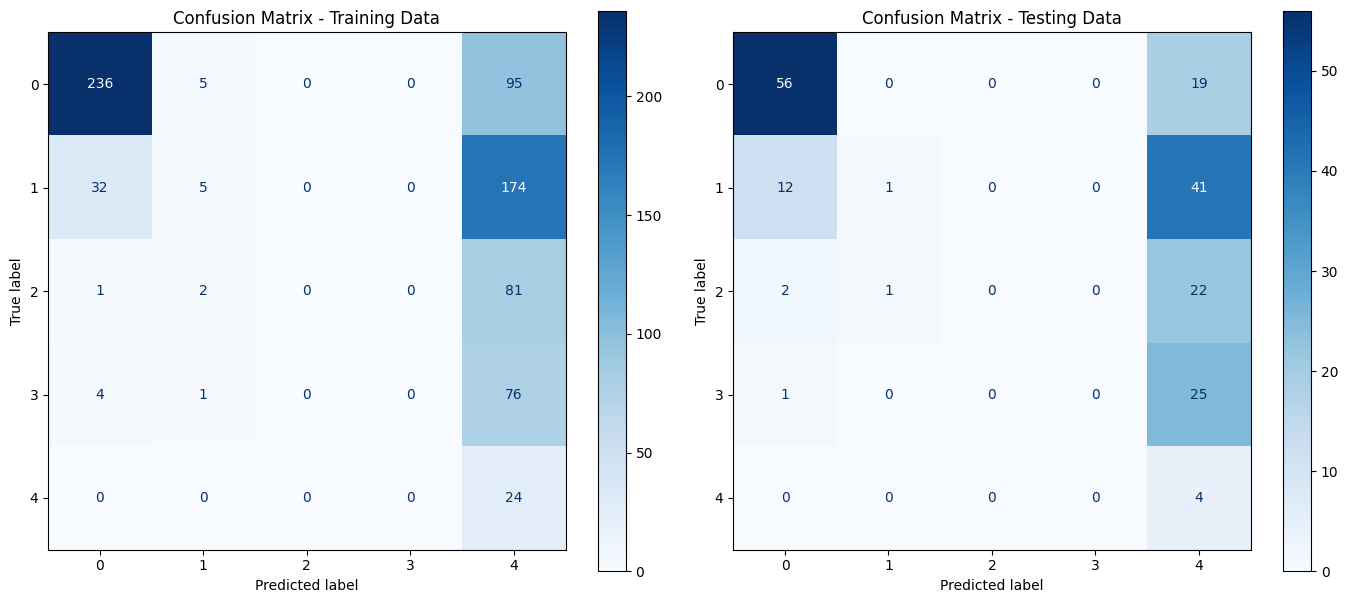

In [76]:
nb_y_train_pred = nb_model.predict(X_train)
nb_y_test_pred = nb_model.predict(X_test)

# Plot confusion matrix for training data
fig, ax = plt.subplots(1, 2, figsize=(14, 6))
ConfusionMatrixDisplay.from_predictions(y_train, nb_y_train_pred, ax=ax[0], cmap='Blues')
ax[0].set_title("Confusion Matrix - Training Data")

# Plot confusion matrix for testing data
ConfusionMatrixDisplay.from_predictions(y_test, nb_y_test_pred, ax=ax[1], cmap='Blues')
ax[1].set_title("Confusion Matrix - Testing Data")
plt.tight_layout()  # Adjust layout to avoid overlap
plt.savefig('gau1.png', dpi=300)
plt.show()

## 8. XGBClassifier Algorithm

In [77]:
from xgboost import XGBClassifier

start_time = time.time()
xgb_model = Pipeline(steps=[
    ('xgb', XGBClassifier(use_label_encoder=False, eval_metric='logloss'))  # XGBClassifier step
])

# Train the model
xgb_model.fit(X_train, y_train)
end_time = time.time()
time_model.append(end_time - start_time)

In [78]:
# Save the pipeline for use in Streamlit
joblib.dump(svm_model, 'xgb_model.pkl')
print("Model saved as 'xgb_model.pkl'")

Model saved as 'xgb_model.pkl'


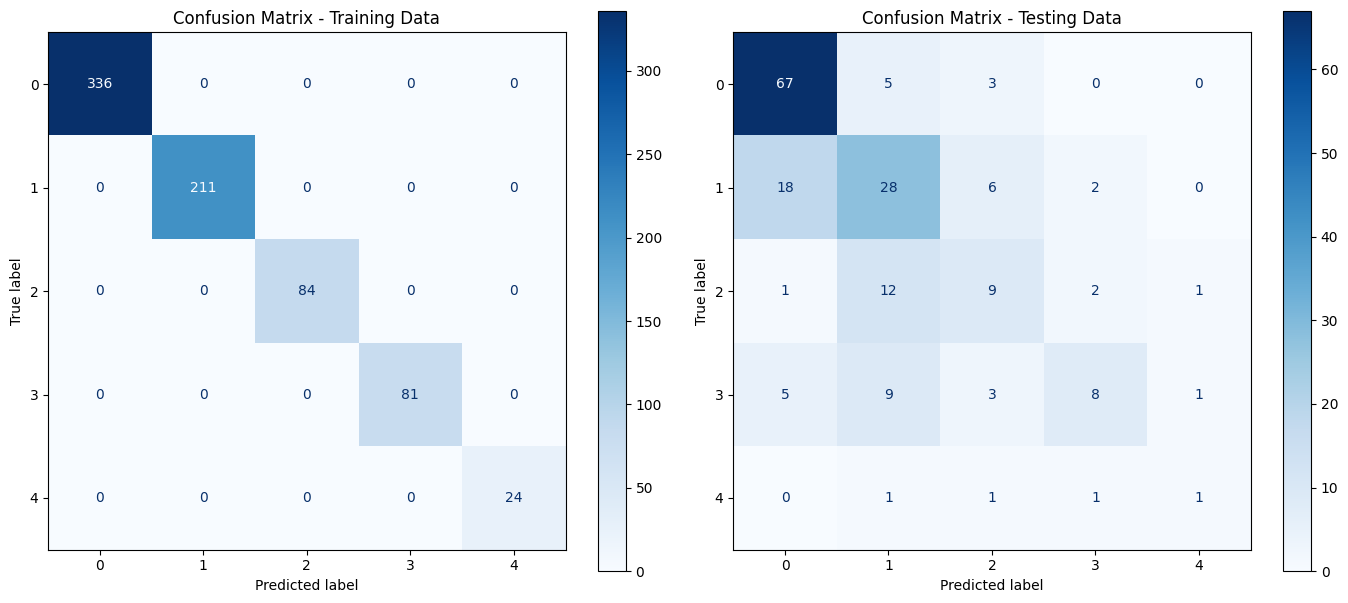

In [79]:
xgb_y_train_pred = xgb_model.predict(X_train)
xgb_y_test_pred = xgb_model.predict(X_test)

# Plot confusion matrix for training data
fig, ax = plt.subplots(1, 2, figsize=(14, 6))
ConfusionMatrixDisplay.from_predictions(y_train, xgb_y_train_pred, ax=ax[0], cmap='Blues')
ax[0].set_title("Confusion Matrix - Training Data")

# Plot confusion matrix for testing data
ConfusionMatrixDisplay.from_predictions(y_test, xgb_y_test_pred, ax=ax[1], cmap='Blues')
ax[1].set_title("Confusion Matrix - Testing Data")
plt.tight_layout()  # Adjust layout to avoid overlap
plt.savefig('xgb1.png', dpi=300)
plt.show()

# Comparison between data

In [80]:
pred_values={
    'KNN':[knn_y_test_pred, knn_y_train_pred],
    'SVM':[svm_y_test_pred, svm_y_train_pred],
    'Logistic Regression':[logreg_y_test_pred, logreg_y_train_pred],
    'Gradient Boosting':[gb_y_test_pred, gb_y_train_pred],
    'Decision Tree':[dt_y_test_pred, dt_y_train_pred],
    'Random Forest':[rf_y_test_pred, rf_y_train_pred],
    'Naive Bayes':[nb_y_test_pred, nb_y_train_pred],
    'XGBoost':[xgb_y_test_pred, xgb_y_train_pred]
}

train_metrics = []
test_metrics = []
def calculate_metrics(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='binary' if len(np.unique(y_true)) == 2 else 'weighted')
    recall = recall_score(y_true, y_pred, average='binary' if len(np.unique(y_true)) == 2 else 'weighted')
    f1 = f1_score(y_true, y_pred, average='binary' if len(np.unique(y_true)) == 2 else 'weighted')
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    return [accuracy, precision, recall, f1, rmse]

# Calculate metrics for each model
for model, (y_test_pred, y_train_pred) in pred_values.items():
    # Test metrics
    test_metrics.append([model] + calculate_metrics(y_test, y_test_pred))
    # Train metrics
    train_metrics.append([model] + calculate_metrics(y_train, y_train_pred))

# Convert lists to DataFrames
train_df = pd.DataFrame(train_metrics, columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score', 'RMSE'])
test_df = pd.DataFrame(test_metrics, columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score', 'RMSE'])


In [81]:
train_df

,Model,Accuracy,Precision,Recall,F1-Score,RMSE
0,KNN,0.679348,0.646537,0.679348,0.655157,0.945527
1,SVM,0.616848,0.582447,0.616848,0.577085,1.037346
2,Logistic Regression,0.625000,0.593793,0.625000,0.598095,0.975933
3,Gradient Boosting,0.937500,0.939448,0.937500,0.937379,0.398707
4,Decision Tree,1.000000,1.000000,1.000000,1.000000,0.000000
5,Random Forest,1.000000,1.000000,1.000000,1.000000,0.000000
6,Naive Bayes,0.360054,0.506651,0.360054,0.369924,2.202086
7,XGBoost,1.000000,1.000000,1.000000,1.000000,0.000000


In [82]:
train_df.to_csv("train_per.csv", index=False)

In [83]:
test_df

,Model,Accuracy,Precision,Recall,F1-Score,RMSE
0,KNN,0.565217,0.499820,0.565217,0.516516,1.055524
1,SVM,0.538043,0.463137,0.538043,0.482541,1.055524
2,Logistic Regression,0.548913,0.483324,0.548913,0.505539,0.994550
3,Gradient Boosting,0.603261,0.577991,0.603261,0.579419,0.944089
4,Decision Tree,0.554348,0.559691,0.554348,0.554788,1.029457
5,Random Forest,0.592391,0.541803,0.592391,0.556679,0.989071
6,Naive Bayes,0.331522,0.469017,0.331522,0.324680,2.105892
7,XGBoost,0.614130,0.599301,0.614130,0.596029,0.961204


In [84]:
test_df.to_csv("test_per.csv", index=False)

**Best Model**

In [85]:
best_accuracy_model = train_df.loc[train_df['Accuracy'].idxmax()]
best_precision_model = train_df.loc[train_df['Precision'].idxmax()]
best_recall_model = train_df.loc[train_df['Recall'].idxmax()]
best_f1_model = train_df.loc[train_df['F1-Score'].idxmax()]
best_rmse_model = train_df.loc[train_df['RMSE'].idxmin()]

# Create a table with the best models
best_models_train = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'RMSE'],
    'Best Model': [
        best_accuracy_model['Model'],
        best_precision_model['Model'],
        best_recall_model['Model'],
        best_f1_model['Model'],
        best_rmse_model['Model']
    ],
    'Score': [
        f"{best_accuracy_model['Accuracy']:.2f}",
        f"{best_precision_model['Precision']:.2f}",
        f"{best_recall_model['Recall']:.2f}",
        f"{best_f1_model['F1-Score']:.2f}",
        f"{best_rmse_model['RMSE']:.2f}"
    ]
})
best_models_train

,Metric,Best Model,Score
0,Accuracy,Decision Tree,1.00
1,Precision,Decision Tree,1.00
2,Recall,Decision Tree,1.00
3,F1-Score,Decision Tree,1.00
4,RMSE,Decision Tree,0.00


In [86]:
best_models_train.to_csv("best_train.csv", index=False)

In [87]:
#for Test Data

best_accuracy_model = test_df.loc[test_df['Accuracy'].idxmax()]
best_precision_model = test_df.loc[test_df['Precision'].idxmax()]
best_recall_model = test_df.loc[test_df['Recall'].idxmax()]
best_f1_model = test_df.loc[test_df['F1-Score'].idxmax()]
best_rmse_model = test_df.loc[test_df['RMSE'].idxmin()]

# Display the best models
print("\nBest Models based on Each Metric (Test Set):")
print(f"Highest Accuracy: {best_accuracy_model['Model']} with Accuracy = {best_accuracy_model['Accuracy']:.2f}")
print(f"Highest Precision: {best_precision_model['Model']} with Precision = {best_precision_model['Precision']:.2f}")
print(f"Highest Recall: {best_recall_model['Model']} with Recall = {best_recall_model['Recall']:.2f}")
print(f"Highest F1-Score: {best_f1_model['Model']} with F1-Score = {best_f1_model['F1-Score']:.2f}")
print(f"Lowest RMSE: {best_rmse_model['Model']} with RMSE = {best_rmse_model['RMSE']:.2f}")




Best Models based on Each Metric (Test Set):
Highest Accuracy: XGBoost with Accuracy = 0.61
Highest Precision: XGBoost with Precision = 0.60
Highest Recall: XGBoost with Recall = 0.61
Highest F1-Score: XGBoost with F1-Score = 0.60
Lowest RMSE: Gradient Boosting with RMSE = 0.94


In [88]:
time_model

[0.011255502700805664,
 0.0680232048034668,
 0.033590078353881836,
 1.382134199142456,
 0.012440681457519531,
 0.4105863571166992,
 3.1258044242858887,
 0.41207313537597656]

In [89]:
from sklearn.metrics import accuracy_score, cohen_kappa_score, mean_absolute_error

table_data = {
    'Algorithm': [],
    'Time': time_model,
    'Correctly Classified %': [],
    'Incorrectly Classified %': [],
    'Attributes': df.shape[1],  # Assuming 'df' is your dataset
    'No of Instances': df.shape[0],
    'Kappa Statistic': [],
    'MAE': [],
    'Precision of YES': [],
    'Precision of NO': [],
    'Classification': []
}

# Loop through each classifier and calculate metrics
for model_name, (y_test_pred, y_train_pred) in pred_values.items():

    # Correctly Classified % and Incorrectly Classified %
    accuracy = accuracy_score(y_test, y_test_pred) * 100
    correctly_classified = accuracy
    incorrectly_classified = 100 - accuracy

    # Kappa Statistic
    kappa = cohen_kappa_score(y_test, y_test_pred)

    # MAE
    mae = mean_absolute_error(y_test, y_test_pred)

    # Precision of YES and NO
    # Precision for multiclass
    precision_yes = precision_score(y_test, y_test_pred, average='macro')  # or 'weighted' depending on your needs
    precision_no = precision_score(y_test, y_test_pred, average='macro')  # using same average for all classes

    # Classification Category based on the algorithm
    if model_name in ['Decision Tree', 'Random Forest', 'XGBoost']:
        classification = 'Trees'
    elif model_name in ['KNN', 'SVM', 'Logistic Regression']:
        classification = 'Functions'
    elif model_name == 'Naive Bayes':
        classification = 'Bayes'
    else:
        classification = 'Boosting'  # For Gradient Boosting

    # Append data to the table
    table_data['Algorithm'].append(model_name)
    table_data['Correctly Classified %'].append(correctly_classified)
    table_data['Incorrectly Classified %'].append(incorrectly_classified)
    table_data['Kappa Statistic'].append(kappa)
    table_data['MAE'].append(mae)
    table_data['Precision of YES'].append(precision_yes)
    table_data['Precision of NO'].append(precision_no)
    table_data['Classification'].append(classification)

# Create DataFrame from table_data dictionary
df_results = pd.DataFrame(table_data)

# Display the table


In [90]:
df_results

,Algorithm,Time,Correctly Classified %,Incorrectly Classified %,Attributes,No of Instances,Kappa Statistic,MAE,Precision of YES,Precision of NO,Classification
0,KNN,0.011256,56.521739,43.478261,16,920,0.346446,0.635870,0.344956,0.344956,Functions
1,SVM,0.068023,53.804348,46.195652,16,920,0.302222,0.657609,0.309304,0.309304,Functions
2,Logistic Regression,0.033590,54.891304,45.108696,16,920,0.329470,0.608696,0.316655,0.316655,Functions
3,Gradient Boosting,1.382134,60.326087,39.673913,16,920,0.414217,0.543478,0.447465,0.447465,Boosting
4,Decision Tree,0.012441,55.434783,44.565217,16,920,0.368439,0.625000,0.406391,0.406391,Trees
5,Random Forest,0.410586,59.239130,40.760870,16,920,0.396114,0.576087,0.384511,0.384511,Trees
6,Naive Bayes,3.125804,33.152174,66.847826,16,920,0.191108,1.565217,0.264954,0.264954,Bayes
7,XGBoost,0.412073,61.413043,38.586957,16,920,0.435948,0.543478,0.520633,0.520633,Trees


In [91]:
df_results.to_csv("result.csv", index=False)

In [92]:
f=8